In [1]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
import numpy as np
import datetime
import imageio
import os
import glob

#The function defined just creates a list of dates between two dates of choice (in this case)
def date_range_list(start_date, end_date):
    # Return list of datetime.date objects (inclusive) between start_date and end_date (inclusive).
    date_list = []
    curr_date = start_date
    while curr_date <= end_date:
        date_list.append(curr_date)
        curr_date += datetime.timedelta(days=1)
    return date_list

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
results = earthaccess.search_datasets(instrument="oci")

In [4]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L3M_IOP_NRT
PACE_OCI_L3M_KD_NRT
PACE_OCI_L3M_PAR_NRT
PACE_OCI_L3M_POC_NRT
PACE_OCI_L3M_RRS_NRT


In [14]:
tspan = ("2024-07-01", "2024-08-05")
bbox = (-159, 26, -157.5, 28)
clouds = (0, 5)

In [15]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_AOP_NRT",
    temporal=tspan,
    bounding_box=bbox,
    #cloud_cover=clouds,
)
paths = earthaccess.open(results)
paths

QUEUEING TASKS | :   0%|          | 0/51 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/51 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/51 [00:00<?, ?it/s]

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240701T224108.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240701T224608.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240702T232049.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240703T221710.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240703T235029.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240704T225151.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240705T232131.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240706T222252.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240706T235611.L2.OC_AOP.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public

In [7]:
avg_avw = []
for num in range(0,len(results)):
        dataset = xr.open_dataset(paths[num])
        datatree = open_datatree(paths[num])
        dataset = xr.merge(datatree.to_dict().values())
        dataset = dataset.set_coords(("longitude", "latitude"))
        avg_avw.append(dataset["avw"].mean())

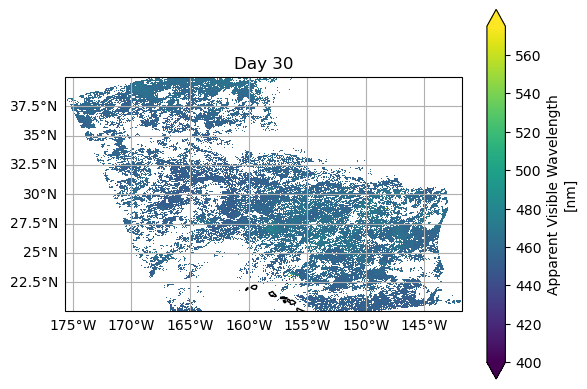

In [24]:
num=44
dataset = xr.open_dataset(paths[num])
datatree = open_datatree(paths[num])
dataset = xr.merge(datatree.to_dict().values())
dataset = dataset.set_coords(("longitude", "latitude"))
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["avw"].plot(x="longitude", y="latitude", cmap="viridis", vmin=400, vmax=575, ax=ax)
ax.set_title("Day 30")
#plt.xlim([165,145])
plt.ylim([20,40])
plt.savefig("AVW_day30.png")

In [112]:
# steps: create a grid (lat lon bounds, list of lats and longs)
# the interpolate data onto new grid
# then merge

In [ ]:
png_list = sorted(list(glob.glob('Day*.png')))# Order of images

In [ ]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in png_list:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

In [157]:
dataset["avw"].mean()

<xarray.DataArray 'avw' ()> Size: 4B
array(458.05963, dtype=float32)

In [167]:
avg_avw[0]

<xarray.DataArray 'avw' ()> Size: 4B
array(456.99643, dtype=float32)

ValueError: x and y must have same first dimension, but have shapes (1,) and (46,)

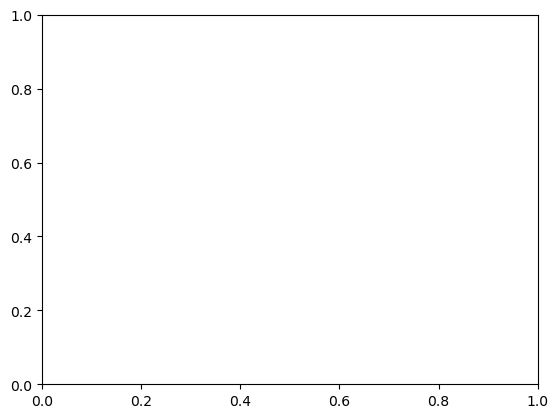

In [166]:
plt.plot(len(avg_avw),avg_avw)

In [165]:
len(avg_avw)

46